# Building a simple neural network classification model with Keras
My goal here is to make a simple neural network with capability to classify handwritten digits.



In [33]:
import keras
from keras.datasets import mnist

In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #importing mnist dataset (images of handwritten digits)

In [35]:
X_train.shape #showing the shape of the loaded images

(60000, 28, 28)

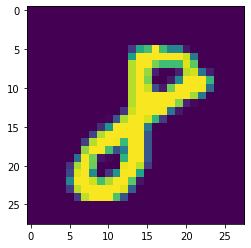

In [38]:
import matplotlib.pyplot as plt
plt.imshow(X_train[31])  #showing one image

We need to flatten these images because a simple neural network can't work with images as inputs. Later on this repository you'll be able to see a CNN.

In [39]:
num_pixels = X_train.shape[1] * X_train.shape[2] #find size of one-dimensional vector (28*28)

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') #flatten training set
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') #flatten test set

In [ ]:
#Normalizing the vectors to be between 0 and 1

from sklearn.preprocessing import scale
X_train = X_train/255
X_test = X_test/255

In [41]:
#one hot encode outputs for being able to use as targets
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [42]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,))) #define the input shape of our model
model.add(Dense(100, activation='relu')) #define how many neurons we have in our first (and only) hidden layer
model.add(Dense(num_classes, activation='softmax')) #output layer with 10 neurons (10 possible digits)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

#evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 11s - loss: 0.2173 - accuracy: 0.9373 - val_loss: 0.1419 - val_accuracy: 0.9630
Epoch 2/10
1875/1875 - 10s - loss: 0.1122 - accuracy: 0.9676 - val_loss: 0.1336 - val_accuracy: 0.9668
Epoch 3/10
1875/1875 - 10s - loss: 0.0858 - accuracy: 0.9751 - val_loss: 0.1256 - val_accuracy: 0.9704
Epoch 4/10
1875/1875 - 10s - loss: 0.0729 - accuracy: 0.9792 - val_loss: 0.1626 - val_accuracy: 0.9646
Epoch 5/10
1875/1875 - 10s - loss: 0.0546 - accuracy: 0.9838 - val_loss: 0.1635 - val_accuracy: 0.9665
Epoch 6/10
1875/1875 - 10s - loss: 0.0530 - accuracy: 0.9853 - val_loss: 0.1460 - val_accuracy: 0.9710
Epoch 7/10
1875/1875 - 10s - loss: 0.0520 - accuracy: 0.9854 - val_loss: 0.1655 - val_accuracy: 0.9699
Epoch 8/10
1875/1875 - 10s - loss: 0.0480 - accuracy: 0.9872 - val_loss: 0.1531 - val_accuracy: 0.9736
Epoch 9/10
1875/1875 - 9s - loss: 0.0390 - accuracy: 0.9898 - val_loss: 0.1862 - val_accuracy: 0.9718
Epoch 10/10
1875/1875 - 9s - loss: 0.0431 - accuracy: 0.9895 - val_loss: 0

In [44]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1])) 

Accuracy: 0.9735999703407288% 
 Error: 0.02640002965927124
